In [49]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import requests

url = "https://uk.wikipedia.org/wiki/Населення_України#Народжуваність"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

html = response.text
tables = pd.read_html(html)

len(tables)


C:\Users\aleks\AppData\Local\Temp\ipykernel_4784\2499553959.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


72

In [2]:
for i, t in enumerate(tables):
    print(i, t.head())

0           0            1
0  Точність  переглянута
1                                    Населення України  \
0  Статево-вікова піраміда населення України на 1...   
1                                        Чисельність   
2                                            Густота   
3                                Коефіцієнт міграції   
4                                      Природний рух   

                                 Населення України.1  
0  Статево-вікова піраміда населення України на 1...  
1                   ▼ 40,96 млн (1 лютого 2022) осіб  
2                                   ▼ 68,2 особи/км²  
3                                             ▲0,9 ‰  
4                                      Природний рух  
2     0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...
3     0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...
4     0                                        

In [3]:
df = tables[13]
df


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


Вивести перші рядки таблиці за допомогою методу head

In [4]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [5]:
df.shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN

In [6]:
df = df.replace("—", np.nan)

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [7]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Замініть типи нечислових колонок на числові

In [8]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Порахуйте, яка частка пропусків міститься в кожній колонці

In [58]:
df.isnull().sum() / len(df)

,0
Регіон,0.000000
1950,0.071429
1960,0.035714
1970,0.035714
1990,0.000000
2000,0.000000
2012,0.000000
2014,0.071429
2019,0.142857


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [9]:
df = df.iloc[:-1]

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [60]:
df = df.fillna(df.mean(numeric_only=True))

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [61]:
avg = df["2019"].mean()
regions_above_avg = df[df["2019"] > avg]["Регіон"]
regions_above_avg

,Регіон
2,Волинська
6,Закарпатська
8,Івано-Франківська
12,Львівська
14,Одеська
16,Рівненська
20,Херсонська
23,Чернівецька
25,Київ


У якому регіоні була найвища народжуваність у 2014 році?

In [62]:
df.loc[df["2014"].idxmax(), "Регіон"]

'Рівненська'

Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

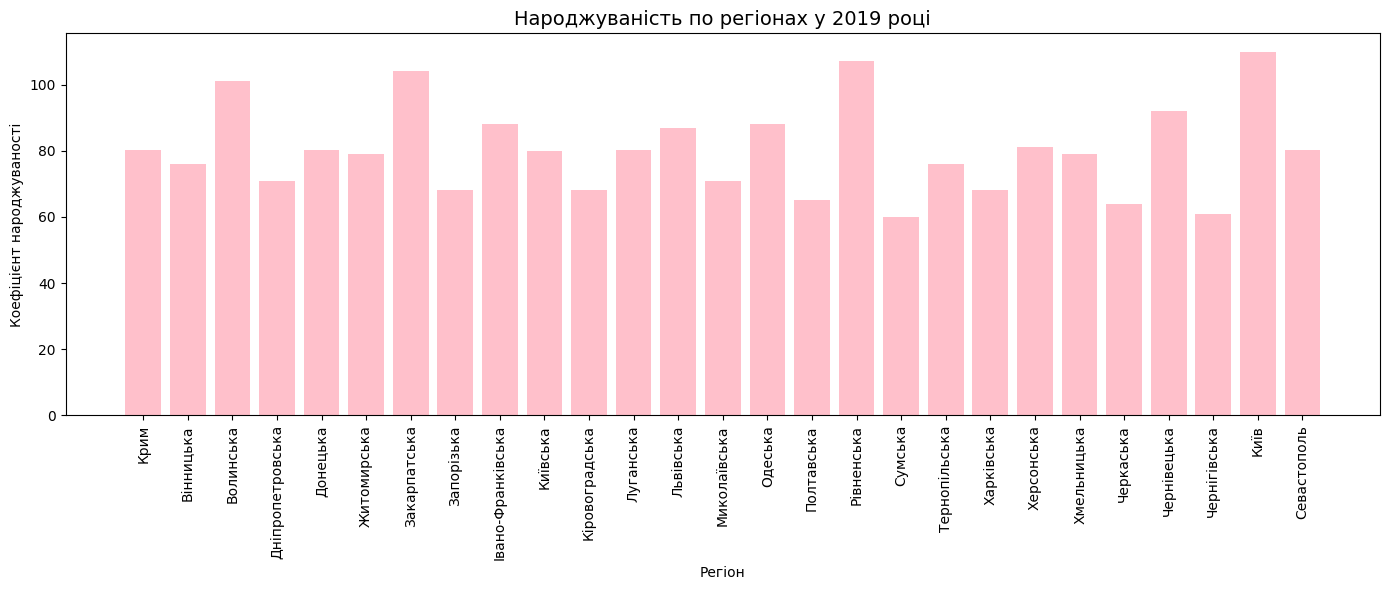

In [72]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.figure(figsize=(14,6))
plt.bar(df["Регіон"], df["2019"], color="pink")

plt.xticks(rotation=90)
plt.title("Народжуваність по регіонах у 2019 році", fontsize=14)
plt.xlabel("Регіон")
plt.ylabel("Коефіцієнт народжуваності")

plt.tight_layout()
plt.show()


Лінійний графік змін по одному регіону

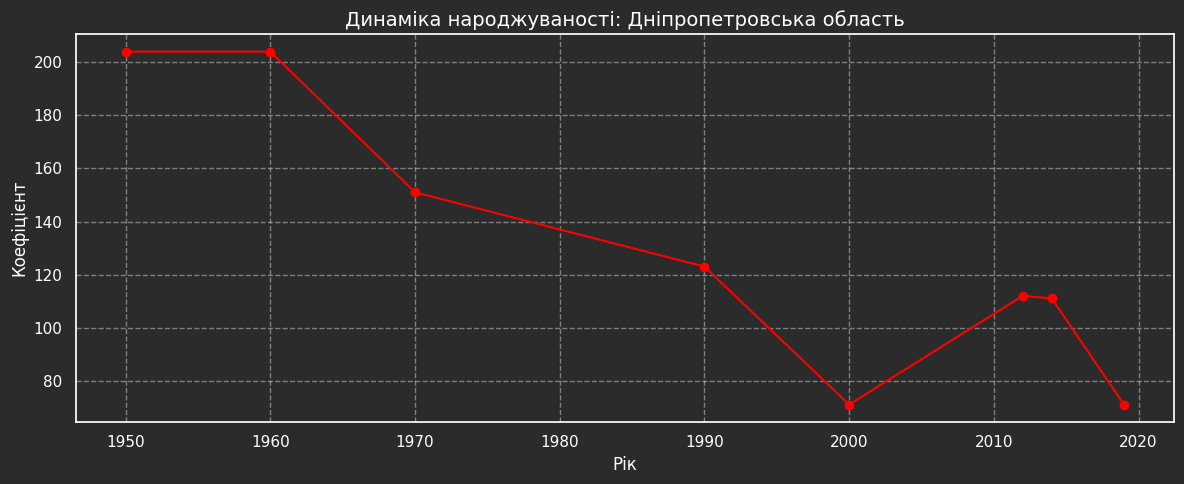

In [64]:
region = "Дніпропетровська"

years = df.columns[1:].astype(int)
values = df[df["Регіон"] == region].iloc[0, 1:]

plt.figure(figsize=(12,5))
plt.plot(years, values, marker="o", linestyle="-", color="red")

plt.title(f"Динаміка народжуваності: {region} область", fontsize=14)
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт")
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


Лінійний графік середнього значення по роках

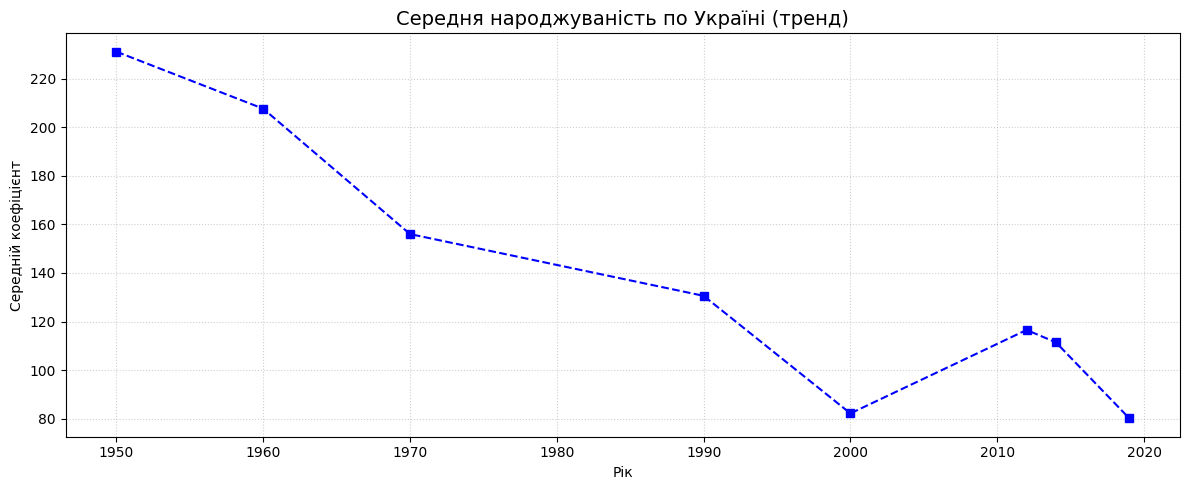

In [70]:
plt.style.use("default")
mean_by_year = df.iloc[:, 1:].mean()

plt.figure(figsize=(12,5))
plt.plot(mean_by_year.index.astype(int),
         mean_by_year.values,
         marker="s",
         linestyle="--",
         color="blue")

plt.title("Середня народжуваність по Україні (тренд)", fontsize=14)
plt.xlabel("Рік")
plt.ylabel("Середній коефіцієнт")

plt.grid(True, linestyle=":", alpha=0.6)

plt.tight_layout()
plt.show()


Кругова діаграма ТОП-5 регіонів за народжуваністю у 2019

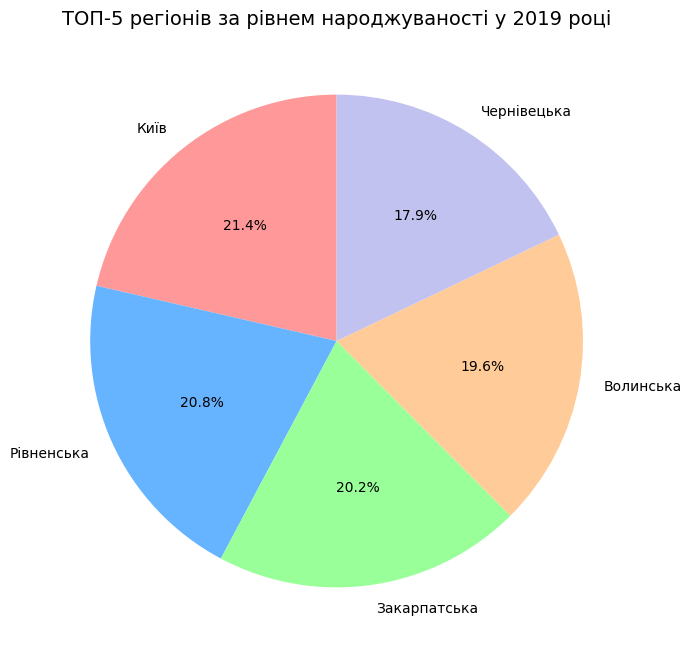

In [71]:
plt.style.use("default")
top5 = df.nlargest(5, "2019")

plt.figure(figsize=(8,8))
plt.pie(
    top5["2019"],
    labels=top5["Регіон"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0"]
)

plt.title("ТОП-5 регіонів за рівнем народжуваності у 2019 році", fontsize=14)
plt.show()


Heatmap усіх регіонів за роками

[Text(0.5, 1.0, 'Показники народжуваності по регіонах і роках'),
 Text(0.5, 19.049999999999997, 'Рік'),
 Text(46.23437499999999, 0.5, 'Регіон')]

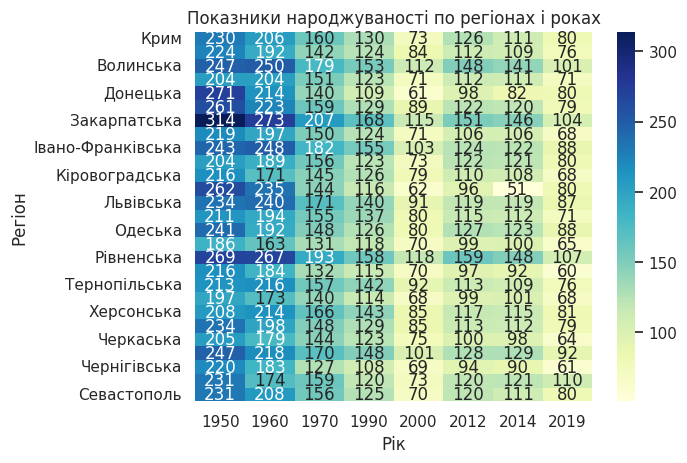

In [73]:
import seaborn as sns
sns.set_theme(style="white", rc={
    "axes.facecolor": "white",
    "figure.facecolor": "white",
})
sns.heatmap(
    df.set_index("Регіон"),
    cmap="YlGnBu",
    annot=True,
    fmt=".0f",
).set(
    title="Показники народжуваності по регіонах і роках",
    xlabel="Рік",
    ylabel="Регіон"
)


Порівняння кількох регіонів

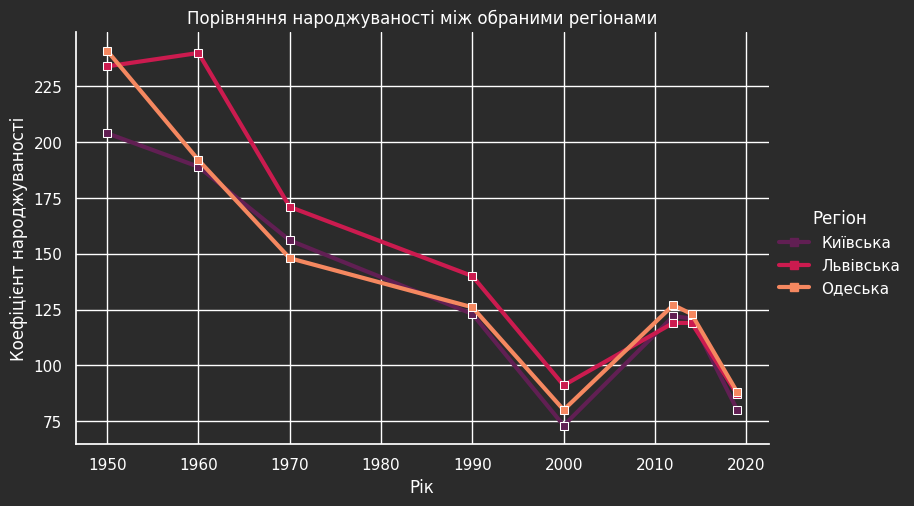

In [74]:
sns.set_theme(style="darkgrid", rc={
    "axes.facecolor": "#2b2b2b",
    "figure.facecolor": "#2b2b2b",
    "text.color": "white",
    "axes.labelcolor": "white",
    "axes.edgecolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
})

regions = ["Київська", "Львівська", "Одеська"]

df_long = df[df["Регіон"].isin(regions)].melt(
    id_vars="Регіон",
    var_name="year",
    value_name="value"
)

df_long = df_long[df_long["year"].str.isdigit()]
df_long["year"] = df_long["year"].astype(int)

sns.relplot(
    data=df_long,
    x="year",
    y="value",
    hue="Регіон",
    kind="line",
    marker="s",
    linewidth=3,
    palette="rocket",
    height=5,
    aspect=1.6
).set(
    title="Порівняння народжуваності між обраними регіонами",
    xlabel="Рік",
    ylabel="Коефіцієнт народжуваності"
)